# Machine Learning: Assignment 2 (IT4060)
# Data Extraction
> We've used [this](https://github.com/prajnasb/observations) open dataset prepared by [Prajna Bhandary](https://github.com/prajnasb)  
> The data was split into 8:1:1 ratio for training, testing and validation purposes

In [1]:
# Downloading the dataset for face mask detection
!git clone https://github.com/akmalahmed525/Facemask_Dataset.git

Cloning into 'Facemask_Dataset'...
remote: Enumerating objects: 1287, done.
remote: Counting objects: 100% (1287/1287), done.
remote: Compressing objects: 100% (1286/1286), done.
remote: Total 1287 (delta 0), reused 1287 (delta 0), pack-reused 0
Receiving objects: 100% (1287/1287), 64.26 MiB | 40.44 MiB/s, done.


In [2]:
!nvidia-smi

Sat Oct  3 15:47:13 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# Check CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [4]:
# Import the Core python and Machine Learning libraries
import os
import cv2
import tensorflow as tf
import numpy as np
import pandas as pd

# Refining Data

In [5]:
# Augmentation configuration
training_dataset_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.3,
                                                            height_shift_range=0.3,
                                                            zoom_range=0.3,
                                                            rotation_range=0.5,
                                                            shear_range=0.3,
                                                            fill_mode="nearest",
                                                            horizontal_flip=True)

testing_dataset_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.3,
                                                            height_shift_range=0.3,
                                                            zoom_range=0.3,
                                                            rotation_range=0.5,
                                                            shear_range=0.3,
                                                            fill_mode="nearest",
                                                            horizontal_flip=True)

In [7]:
# Data augmentation
training_dataset = training_dataset_generator.flow_from_directory("/content/Facemask_Dataset/train", target_size=(180, 180), batch_size=125, class_mode="binary")
testing_dataset = testing_dataset_generator.flow_from_directory("/content/Facemask_Dataset/test", target_size=(180, 180), batch_size=25, class_mode="binary")

Found 1097 images belonging to 2 classes.
Found 137 images belonging to 2 classes.


In [8]:
# Declaring constants
# Training dataset
train_with_mask = "/content/Facemask_Dataset/train/with_mask/"
train_without_mask = "/content/Facemask_Dataset/train/without_mask/"

# Testing dataset
test_with_mask = "/content/Facemask_Dataset/test/with_mask/"
test_without_mask = "/content/Facemask_Dataset/test/without_mask/"


wmask_fnames = os.listdir(train_without_mask)
mask_fnames = os.listdir(train_with_mask)

# Building a CNN Model

In [9]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(180,180, 3)))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2, 2))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       1

In [10]:
# Compiling the model
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

# Training Model

In [11]:
history = model.fit(training_dataset, epochs=30, verbose=1, validation_data=testing_dataset)

Epoch 1/30
9/9 [==============================] - 10s 1s/step - loss: 52.9953 - accuracy: 0.5032 - val_loss: 0.7441 - val_accuracy: 0.5036
Epoch 2/30
9/9 [==============================] - 11s 1s/step - loss: 0.7492 - accuracy: 0.5050 - val_loss: 0.6896 - val_accuracy: 0.5036
Epoch 3/30
9/9 [==============================] - 11s 1s/step - loss: 0.6792 - accuracy: 0.5114 - val_loss: 0.6709 - val_accuracy: 0.5547
Epoch 4/30
9/9 [==============================] - 11s 1s/step - loss: 0.6463 - accuracy: 0.5287 - val_loss: 0.6081 - val_accuracy: 0.7737
Epoch 5/30
9/9 [==============================] - 11s 1s/step - loss: 0.5583 - accuracy: 0.7366 - val_loss: 0.5035 - val_accuracy: 0.7810
Epoch 6/30
9/9 [==============================] - 11s 1s/step - loss: 0.4943 - accuracy: 0.7803 - val_loss: 0.5193 - val_accuracy: 0.7591
Epoch 7/30
9/9 [==============================] - 11s 1s/step - loss: 0.4850 - accuracy: 0.8067 - val_loss: 0.4312 - val_accuracy: 0.8467
Epoch 8/30
9/9 [=================

In [12]:
# Save the model
model.save("face_mask_classifier.h5")

# Results

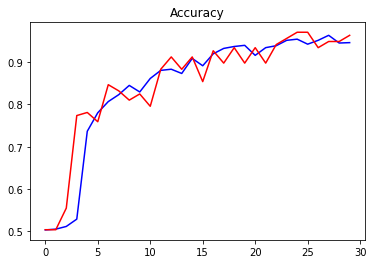

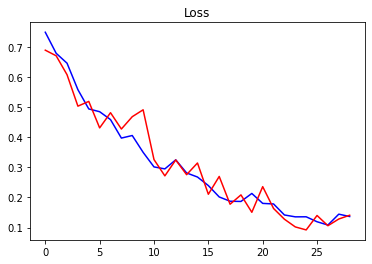

In [33]:
# Checking the accuracy
import matplotlib.pyplot as plt

training_accuracy = history.history['accuracy']
training_loss = history.history['loss'][1:]

testing_accuracy = history.history['val_accuracy']
testing_loss = history.history['val_loss'][1:]
epochs = range(len(training_accuracy))
epoch_loss = range(len(training_accuracy)-1)

plt.title('Accuracy')
plt.plot(epochs, training_accuracy, color='blue')
plt.plot(epochs, testing_accuracy, color='red')
plt.show()

plt.title('Loss')
plt.plot(epoch_loss, training_loss, color='blue')
plt.plot(epoch_loss, testing_loss, color='red')
plt.show()

In [15]:
# Camera capture function from colab
# Open the web camera to capture image
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


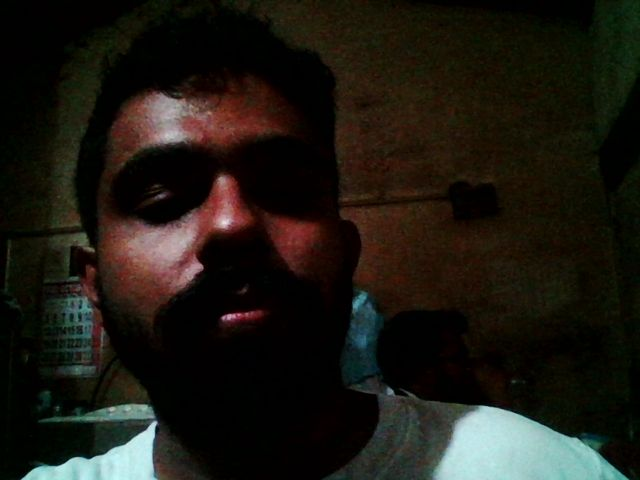

In [16]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  display(Image(filename))
except Exception as err:
  print(str(err))

In [21]:
# Camera util function

# Constants
IMAGE_WIDTH = 180
IMAGE_HEIGHT = 180

def detect_facemask(image_path):
  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  new_img = cv2.resize(img, (IMAGE_WIDTH, IMAGE_HEIGHT))
  s0 = new_img.shape[0]
  s1 = new_img.shape[1]
  new_img_reshaped = new_img.reshape(1, s0, s1, 3)
  predicted_img = testing_dataset_generator.flow(new_img_reshaped)

  plt.imshow(new_img)
  plt.show()
  prediction = model.predict(predicted_img)
  print(prediction[0])
  print("Not wearing a face mask" if prediction[0][0] > 0.5 else "Wearing a face mask" )

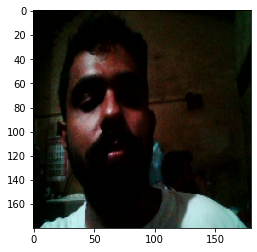

[0.7567756]
Not wearing a face mask


In [22]:
detect_facemask("/content/photo.jpg")

In [23]:
!wget https://upload.wikimedia.org/wikipedia/commons/6/6a/Faces_from_the_Libyan_front_7.jpg --output-document=no_face_mask.jpg

--2020-10-03 16:11:49--  https://upload.wikimedia.org/wikipedia/commons/6/6a/Faces_from_the_Libyan_front_7.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172826 (169K) [image/jpeg]
Saving to: ‘no_face_mask.jpg’

no_face_mask.jpg    100%[===================>] 168.78K  --.-KB/s    in 0.09s   

2020-10-03 16:11:50 (1.89 MB/s) - ‘no_face_mask.jpg’ saved [172826/172826]



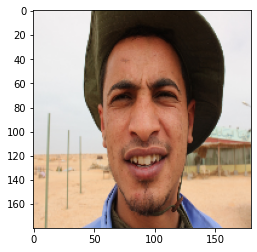

[0.9658165]
Not wearing a face mask


In [24]:
detect_facemask("/content/no_face_mask.jpg")

In [25]:
!wget https://live.staticflickr.com/65535/49678198708_464ea4cb07_b.jpg --output-document=with_face_mask.jpg

--2020-10-03 16:11:59--  https://live.staticflickr.com/65535/49678198708_464ea4cb07_b.jpg
Resolving live.staticflickr.com (live.staticflickr.com)... 13.224.26.167, 2600:9000:2164:e800:0:5a51:64c9:c681, 2600:9000:2164:2000:0:5a51:64c9:c681, ...
Connecting to live.staticflickr.com (live.staticflickr.com)|13.224.26.167|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘with_face_mask.jpg’

with_face_mask.jpg      [ <=>                ]  96.09K  --.-KB/s    in 0.01s   

2020-10-03 16:11:59 (6.98 MB/s) - ‘with_face_mask.jpg’ saved [98400]



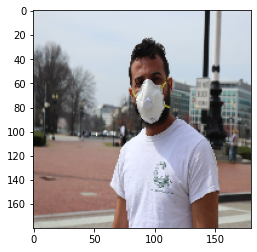

[0.02608367]
Wearing a face mask


In [26]:
detect_facemask("/content/with_face_mask.jpg")